In [1]:
debug=False

import sys
sys.path.append("../modules")

from HPIB4155 import *
from HPIB_plot import*

GPIBch='GPIB0::17'

timeout=30

In [53]:
ptype=False
temp=3.2

VGS = {
    'enable' : True,
    'Vgstart' : 0, 'Vgstop' : 1.5, 'Vgstep' : 0.01,
    'Vd' : '50m', 'Compliance' : '1.5m'
    }

# SubVt = {
#     'enable' : True,
#     'VGstart' : Vt-0.2, 'VGstop' : Vt+0.2, 'VGstep' : '1m',
#     'VD' : '10m', 'Compliance' : '10m'
#     }
    
VGS_sat = {
    'enable' : True,
    'Vgstart' : 0, 'Vgstop' : 1.5, 'Vgstep' : 0.01,
    'Vd' : 1.5, 'Compliance' : '1.5m'
    }

VDS = {
    'enable' : True,
    'Vdstart' : 0, 'Vdstop' : 1.5, 'Vdstep' : 0.01,
    'Vgstart' : 0.5, 'Vgstop' : 1.5, 'Vgstep' : 0.25,
    'Compliance' : '1.5m'
    }

Ex_Is = {
    'enable' : True,
    'VSstart' : 0, 'VSstop' : 0.5, 'VSstep' : 0.001,
    'VGstart' : 0.8, 'VGstop' : 1, 'VGstep' : 0.1,
    'VDvalue' : 1,
    'Compliance' : '1.5m'
    }

VP = {
    'enable' : True,
    'VGstart' : -1.5, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'Is' : -2.98e-06, 'Compliance' : 1.5
    }

In [2]:
HP=HP4155(GPIBch, debug=debug)
HP.StopFlag=False

HEWLETT-PACKARD,4155A,0,01.04:01.04:01.00


In [3]:
prefix=input()

now=datetime.datetime.now().strftime('%y%m%d')

if os.path.isdir('C:/Users/Zucchi/Documents/Medidas'):
    path='C:/Users/Zucchi/Documents/Medidas'
else: 
    path="C:/Users/Zucchi-Note/Dropbox/Cryochip/Medidas"

path+=f"/{prefix}/"

print(path)

os.makedirs(path, exist_ok=True)

 240621 - TN3 TN12 TP1 DN1 DN2 CB1


C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/


Set Diode
Vf=(0, 1.6)
Diode


'C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/Diode-240621 153842-300K.png'

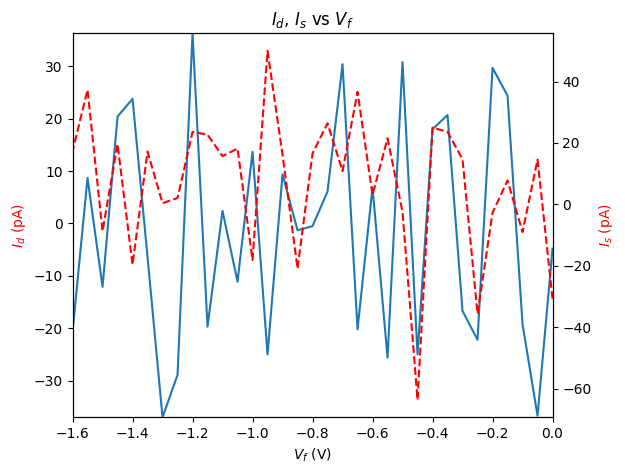

In [59]:
HP.SetDiode(0, -1.7, -0.05)
HP.SetIntTime("MED")
HP.SetHoldTime(0.01)

now=datetime.datetime.now().strftime("%y%m%d %H%M%S")

plotp=f"{path}{HP.term}-{now}-300K.csv"

HP.SingleSave(plotp, timeout)
Plot(plotp, "Vf", ["Id", "Is"])

Set Diode
Vf=(0.5, -0.5)
Diode


'C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/ch5Diode-240621 170603-300K.png'

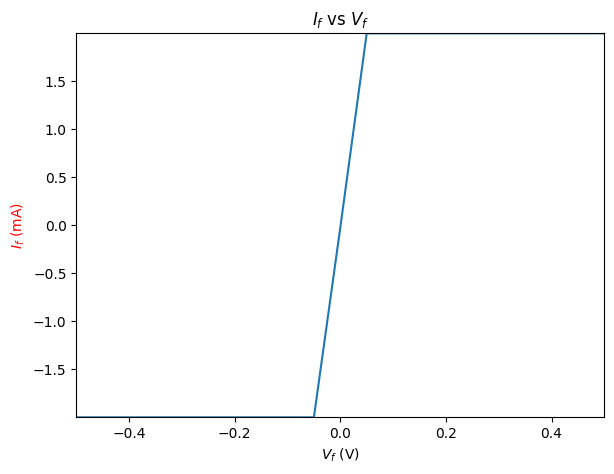

In [78]:
HP.SingleDiode(0.5, -0.5, -.05, SMUP="SMU1", SMUN="SMU2")
HP.SetIntTime("MED")

now=datetime.datetime.now().strftime("%y%m%d %H%M%S")

plotp=f"{path}ch5{HP.term}-{now}-300K.csv"

HP.SingleSave(plotp, timeout)
Plot(plotp, "Vf", "If")

In [16]:
HP.SetIntTime("MED")
HP.ask(":PAGE:MEAS:MSET:ITIM?")

'MED'

In [70]:
if VGS['enable']:
    HP.SetVgS(VGS, ptype)
    
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVgs
 Vg=(0, 1.5, 0.01), Vd=0.05, Ilim=0.0015


IdxVgs
VTO fail


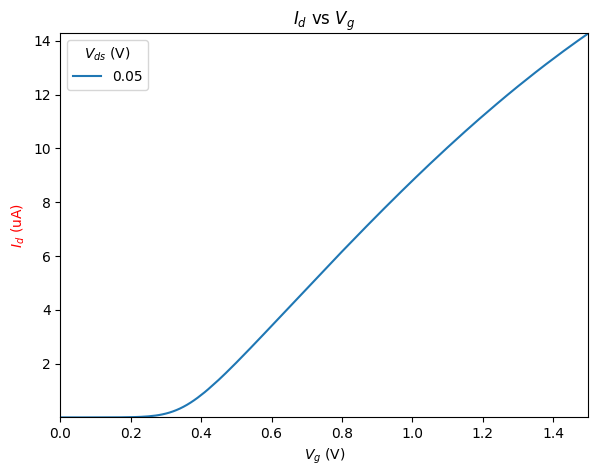

In [72]:
if VGS['enable']:
    HP.SingleSave(plotp, timeout*5)
    try: 
        VTO=PlotVgs(plotp)
        print(VTO)
    except:
        Plot(plotp, 'Vg', 'Id')
        print("VTO fail")

In [62]:
if VGS_sat['enable']:
    HP.SetVgS(VGS_sat, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVgs
 Vg=(0, 1.5, 0.01), Vd=1.5, Ilim=0.0015


IdxVgs
VTO fail


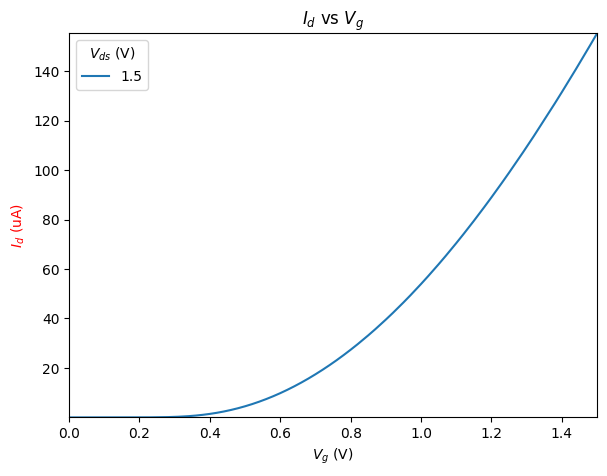

In [64]:
if VGS_sat['enable']:
    HP.SingleSave(plotp, timeout*60)
    try:
        VTO=PlotVgs(plotp)
        print(VTO)
    except:
        Plot(plotp, 'Vg', 'Id')
        print("VTO fail")

In [11]:
if Ex_Is['enable']:
    HP.SetEXIS(Ex_Is, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set Ex_Is
 Vs=(0, -0.5, -0.001), Vg=(-0.8, -1, -0.1), Vd=-1


HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
[2.96502824e-14 1.55577310e-20 1.42093489e-20]
Is=9.88e-15   AbsDev: 3.953368995958934e-14


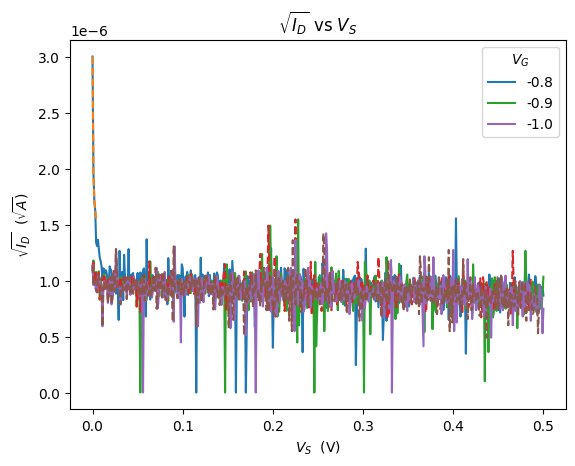

In [12]:
if Ex_Is['enable']:    
    HP.SingleSave(plotp, timeout*7)
    iscalc=plotp
    VP['Is']=CalcIs(iscalc, temp, ptype)

In [13]:
if VP['enable']:
    HP.SetVP(VP, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set VpxVgs
Is=-9.883437373437257e-15, Vg=(1.5, -1.5, -0.01), Vlim=1.5


HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s


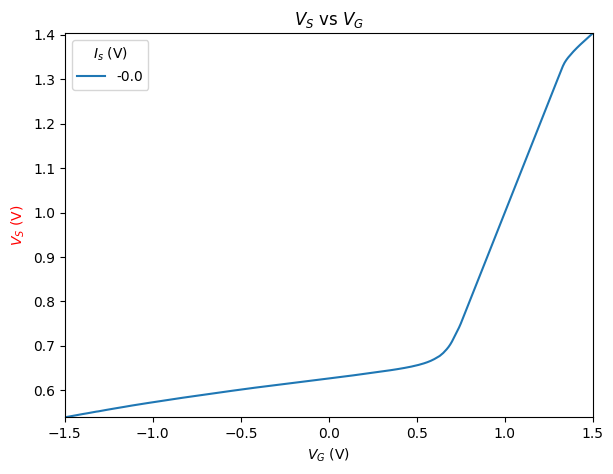

In [14]:
if VP['enable']: 
    HP.SingleSave(plotp, timeout*60)
    Plot(plotp, 'VG', 'VS')

In [15]:
df=pd.read_csv(plotp, header=[0, 1])
VS=np.abs(df['VS'][df['VS'].columns[0]])
VG=df['VG'][df['VS'].columns[0]]
VG[np.argmin(VS)]

-1.5

In [65]:
if VDS['enable']:
    HP.SetVdS(VDS, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVds
Vd=(0, 1.5, 0.01), Vg=(0.5, 1.5, 0.25), Ilim=0.0015


IdxVds
30s 30s | 

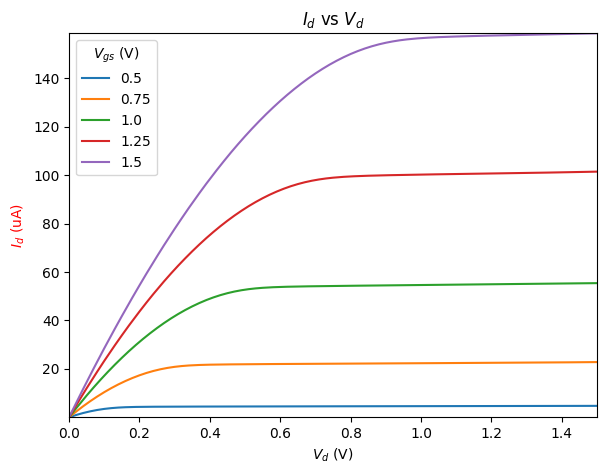

In [66]:
if VDS['enable']:
    HP.SingleSave(plotp, timeout*60*7)
    Plot(plotp, 'Vd', 'Id')

'C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/IdxVds-240621 152609.png'

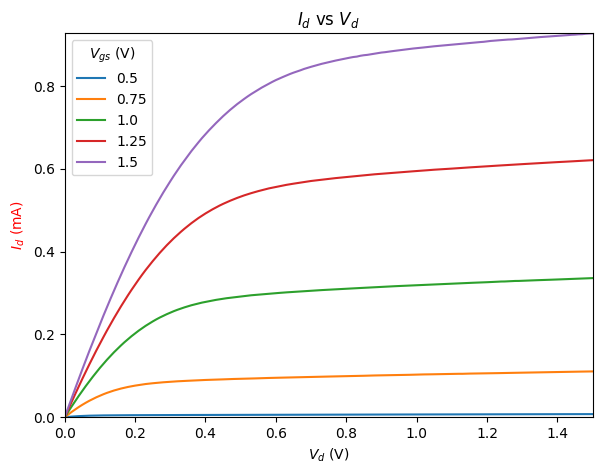

In [56]:
Plot(plotp, 'Vd', 'Id')